In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab
%matplotlib inline
import seaborn as sns
from bokeh import mpl

#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import *
import pydendroheatmap as pdh

import pickle

matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']

#cartodb links
general link
https://jzangh.cartodb.com/viz/79c6a53c-06b8-11e6-824c-0e3ff518bd15/public_map

for embedding
<iframe width="100%" height="520" frameborder="0" src="https://jzangh.cartodb.com/viz/79c6a53c-06b8-11e6-824c-0e3ff518bd15/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>

js for apps
https://jzangh.cartodb.com/api/v2/viz/79c6a53c-06b8-11e6-824c-0e3ff518bd15/viz.json

In [4]:
#example with JFK-SFO
#carrier breakdown
airlineBreakdownDict={"AA":1714,"B6":1765,"DL":2275,"UA":1920,"VX":1606}

In [5]:
airlineBreakdownDict["AA"]

1714

In [6]:
#import the data
JFK_SFO_stats=pd.read_csv('/home/vagrant/capstone/2016-03-28_downloads/OTP_detailed/analysis_2016-04-18/JFK_SFO_route_analysis/abridged_JFK-SFO.txt',sep="\t")

In [77]:
JFK_SFO_stats['CarrierDelay'].head()
JFK_SFO_stats.head()

,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,FlightNum,Origin,Dest,DepDelay,...,Cancelled,CancellationCode,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,1,4,2015-01-01,AA,19805,15,JFK,SFO,-5.0,...,0.0,NaN,0.0,388.0,2586.0,0.0,0.0,48.0,0.0,0.0
1,1,2,5,2015-01-02,AA,19805,15,JFK,SFO,-3.0,...,0.0,NaN,0.0,369.0,2586.0,NaN,NaN,NaN,NaN,NaN
2,1,3,6,2015-01-03,AA,19805,15,JFK,SFO,-1.0,...,0.0,NaN,0.0,352.0,2586.0,NaN,NaN,NaN,NaN,NaN
3,1,4,7,2015-01-04,AA,19805,15,JFK,SFO,-5.0,...,0.0,NaN,0.0,375.0,2586.0,NaN,NaN,NaN,NaN,NaN
4,1,5,1,2015-01-05,AA,19805,15,JFK,SFO,-5.0,...,0.0,NaN,0.0,364.0,2586.0,NaN,NaN,NaN,NaN,NaN


In [183]:
print AirlineMarketShare.index.values
[colorDict[x] for x in AirlineMarketShare.index.values]
fullNames={'AA':'American','B6':'Jetblue','DL':'Delta','UA':'United','VX':'Virgin','WN':'Southwest'}
print AirlineMarketShare.index.values
[fullNames[x] for x in AirlineMarketShare.index.values]

['AA' 'B6' 'DL' 'UA' 'VX']
['AA' 'B6' 'DL' 'UA' 'VX']


['American', 'Jetblue', 'Delta', 'United', 'Virgin']

               AirlineID
UniqueCarrier           
AA                  1714
B6                  1765
DL                  2275
UA                  1920
VX                  1606


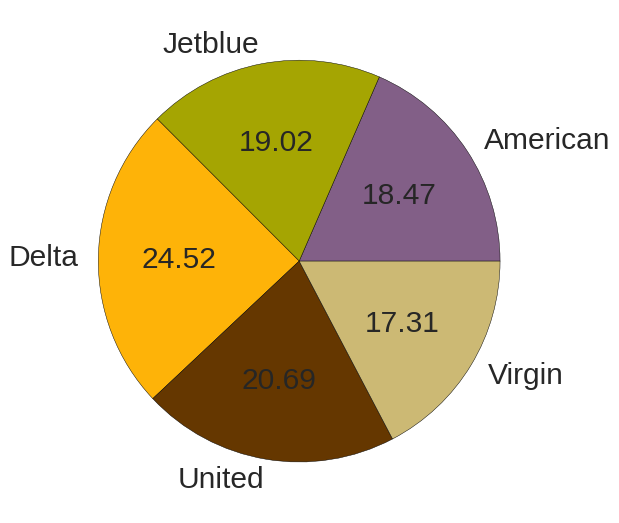

In [184]:
#AirlineMarketShare=JFK_SFO_stats[['UniqueCarrier','AirlineID']].groupby(['UniqueCarrier']).aggregate(np.count_nonzero)
print AirlineMarketShare

#http://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

colorDict={'AA':'#825F87','DL':'#FEB308','UA':'#653700','B6':'#A5A502','WN':'#2100D4','VX':'#CCB974'}
fullNames={'AA':'American','B6':'Jetblue','DL':'Delta','UA':'United','VX':'Virgin','WN':'Southwest'}
#http://pandas.pydata.org/pandas-docs/stable/visualization.html#colormaps
AirlineMarketShare.plot.pie(subplots=True,figsize=(6,6),legend=False,fontsize=20,
                            labels=[fullNames[x] for x in AirlineMarketShare.index.values],
                           #labels=['American','JetBlue','Delta','United','Virgin'],
                            colors=[colorDict[x] for x in AirlineMarketShare.index.values],
                            autopct='%.2f'
                           )
#print AirlineMarketShare.index.values
plt.ylabel('')#no ylabel
plt.savefig("AirlineBreakdown_JFK-SFO_delayTimes.svg",dpi=150)

In [128]:
#byDayOfWeek=JFK_SFO_stats.groupby(['DayOfWeek']).aggregate(,'Cancelled','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']).aggregate(np.count_nonzero)
CancellationbyDayOfWeek=JFK_SFO_stats.groupby(['DayOfWeek']).aggregate({'Cancelled':np.count_nonzero})
#byDayOfWeek

In [133]:
#general info
{'Flights in 2015': 9280,'Average Flights per Day': 25,'Origin': 'JFK','OriginCityName':'New York, NY','Dest':'SFO','DestCityName':'San Francisco, CA','Distance': 2586}

{'Average Flights per Day': 25,
 'Dest': 'SFO',
 'DestCityName': 'San Francisco, CA',
 'Distance': 2586,
 'Flights in 2015': 9280,
 'Origin': 'JFK',
 'OriginCityName': 'New York, NY'}

In [135]:
def grt0(x):
    return 1 if x > 0 else 0


DelaybyDayOfYear=JFK_SFO_stats.groupby(['FlightDate']).aggregate({'FlightCount':'count',
                                                                  'Cancelled':np.count_nonzero,'CarrierDelay':['count',np.count_nonzero,np.sum],
                                                                  'WeatherDelay':['count',np.count_nonzero,np.sum]})
DelaybyDayOfYear

Cancelled FlightNum CarrierDelay                       \
           count_nonzero     count        count count_nonzero    sum   
FlightDate                                                             
2015-01-01           0.0        19            2          18.0    7.0   
2015-01-02           0.0        25            6          24.0   77.0   
2015-01-03           0.0        21           10          16.0  125.0   
2015-01-04           0.0        23            7          21.0  123.0   
2015-01-05           0.0        25            3          25.0   36.0   
2015-01-06           0.0        25           19          11.0  290.0   
2015-01-07           0.0        23            3          20.0    0.0   
2015-01-08           0.0        26            4          24.0   55.0   
2015-01-09           0.0        24            8          19.0   54.0   
2015-01-10           0.0        19            3          19.0  119.0   
2015-01-11           0.0        25            1          25.0   20.0   
2015-01-12           0.0        26            3          26.0  181.0   
2015-01-13           0.0        25            0          25.0    NaN   
2015-01-14           0.0        25            1          25.0   49.0   
2015-01-15           0.0        26            1          26.0   38.0   
2015-01-16           0.0        25            5          22.0   42.0   
2015-01-17           0.0        17            1          17.0   20.0   
2015-01-18           0.0        22            9          15.0   85.0   
2015-01-19           1.0        26            2          25.0    6.0   
2015-01-20           0.0        25            2          24.0   35.0   
2015-01-21           0.0        25            1          25.0  103.0   
2015-01-22           0.0        26            1          26.0  138.0   
2015-01-23           0.0        25            2          24.0   78.0   
2015-01-24           0.0        19            3          18.0   41.0   
2015-01-25           0.0        25            1          25.0    4.0   
2015-01-26           6.0        26            8          19.0   63.0   
2015-01-27          23.0        25            0          25.0    NaN   
2015-01-28           7.0        25            0          25.0    NaN   
2015-01-29           0.0        26            1          26.0   64.0   
2015-01-30           0.0        25            7          19.0   61.0   
...                  ...       ...          ...           ...    ...   
2015-12-02           0.0        22            3          19.0    0.0   
2015-12-03           0.0        23           13          11.0  138.0   
2015-12-04           0.0        22            0          22.0    NaN   
2015-12-05           0.0        16            1          16.0   92.0   
2015-12-06           0.0        22            0          22.0    NaN   
2015-12-07           0.0        24            2          22.0    0.0   
2015-12-08           0.0        22            2          21.0   13.0   
2015-12-09           0.0        23            4          20.0   10.0   
2015-12-10           0.0        24           14          14.0  201.0   
2015-12-11           0.0        23            6          17.0    0.0   
2015-12-12           0.0        16            0          16.0    NaN   
2015-12-13           0.0        23           12          12.0   11.0   
2015-12-14           0.0        24            3          23.0   41.0   
2015-12-15           0.0        22            1          22.0   34.0   
2015-12-16           0.0        22            2          21.0   12.0   
2015-12-17           0.0        21            4          21.0  149.0   
2015-12-18           0.0        23           15          10.0   51.0   
2015-12-19           0.0        18           10          15.0  157.0   
2015-12-20           0.0        22           13          11.0   38.0   
2015-12-21           0.0        20           17           8.0  108.0   
2015-12-22           0.0        19            9          16.0  108.0   
2015-12-23           0.0        21           10        

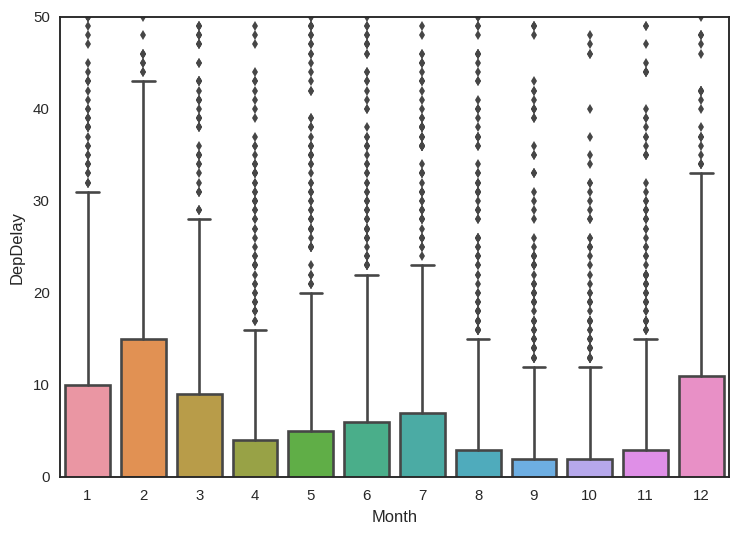

In [165]:
JFK_SFO_stats.head()
axes=plt.gca()
axes.set_ylim(0,50)

#sns.violinplot(x="Month", y="DepDelay", data=JFK_SFO_stats,inner="quart")

sns.boxplot(x="Month", y="DepDelay", data=JFK_SFO_stats)
#sns.boxplot(x="DayOfWeek", y="DepDelay", data=JFK_SFO_stats)


#unit='DayOfWeek'

#sns.boxplot(x='DayOfWeek', y="DepDelay", data=JFK_SFO_stats.sort_values(by='DayOfWeek'))
plt.savefig("byMonth_JFK-SFO_delayTimes.svg",dpi=150)


In [ ]:
CancellationbyDayOfYear=JFK_SFO_stats.groupby(['DayOfWeek']).aggregate({'Cancelled':np.count_nonzero})

### delay type analysis

In [186]:
#import the data
#DelayInfoOnly_stats=pd.read_csv('/home/vagrant/capstone/2016-03-28_downloads/OTP_detailed/analysis_2016-04-18/2015_delayCategoryCounts.txt',sep="\t")
print len(DelayInfoOnly_stats)#1063439
DelayInfoOnly_stats.head()

1063439


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,25.0,0.0,0.0
1,0.0,79.0,0.0,0.0,0.0
2,22.0,0.0,2.0,0.0,0.0
3,0.0,0.0,45.0,0.0,105.0
4,28.0,0.0,0.0,0.0,0.0


TypeError: 'function' object has no attribute '__getitem__'

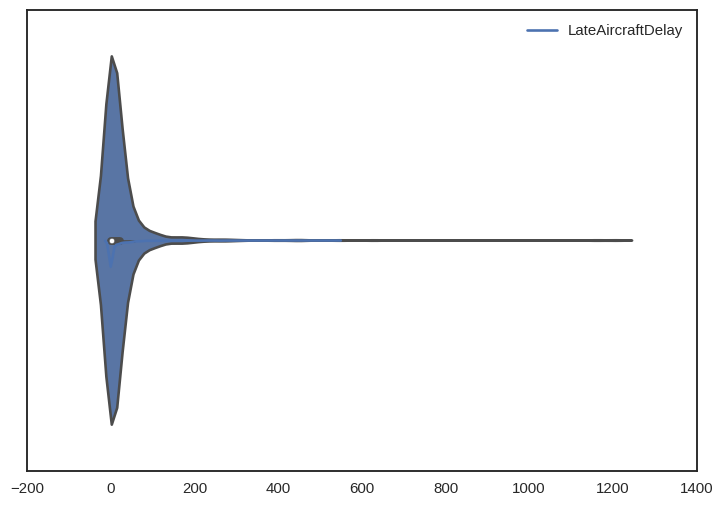

In [190]:
miniDelayInfo=DelayInfoOnly_stats.head(1000)
sns.violinplot([miniDelayInfo.CarrierDelay])
sns.kdeplot(miniDelayInfo.LateAircraftDelay)


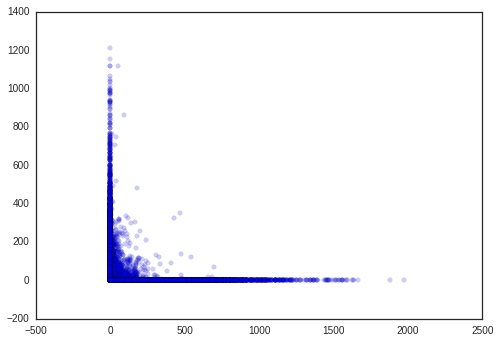

In [61]:
plt.scatter(DelayInfoOnly_stats['CarrierDelay'],DelayInfoOnly_stats['WeatherDelay'],alpha=0.2)
#sns.pairplot(DelayInfoOnly_stats)

In [60]:
plt.savefig('test.png',dpi=160)
#plt.savefig('zoomed_ArrivalDelayBreakdown_19busiestAirports_2014.svg',dpi=160)
